In [3]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from umap import UMAP

# Импортируем датасет вин(белых)

In [4]:
wine_quality = pd.read_csv('winequality-white.csv', sep=';')
wine_quality

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

*В описании датасета сказано, что данные параметры не относятся к конкретному сорту, виду по сухости*

# Подготовка датасета к анализу

## Приведем название колонок к удобной для работы форме(без пробелов)

In [5]:
wine_quality = wine_quality.rename(columns={
    'fixed acidity':'fixed_acidity',
    'volatile acidity':'volatile_acidity',
    'citric acid':'citric_acid',
    'residual sugar':'residual_sugar',
    'free sulfur dioxide':'free_sulfur_dioxide',
    'total sulfur dioxide':'total_sulfur_dioxide'
})
wine_quality

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

## Проверим датасет на нулевые значения и явные дубликаты и удалим их

In [6]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


*Нулевых значений нет*

In [7]:
wine_quality.duplicated().sum()

937

*Найдено 937 явно дублирующихся строк в датасете*

In [8]:
wine_quality = wine_quality.drop_duplicates()
wine_quality.duplicated().sum()

0

*Восстановим порядок нумерации элементов*

In [9]:
wine_quality = wine_quality.reset_index(drop=True)
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   residual_sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free_sulfur_dioxide   3961 non-null   float64
 6   total_sulfur_dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


# Подготовим данные перед использованием сжатия

In [10]:
wine_quality.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
# wine_quality.quality = pd.Categorical(wine_quality.quality)

In [12]:
# pd.Categorical(wine_quality.quality)

## Приведем значения в ячейках к стандартному виду

In [13]:
scaled_wine_quality = StandardScaler().fit_transform(wine_quality.iloc[:,:11])
scaled_wine_quality = pd.DataFrame(scaled_wine_quality).rename(columns={i:wine_quality.columns[i] for i in range(11)})
scaled_wine_quality['quality'] = wine_quality.quality
scaled_wine_quality

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.185352         -0.101889     0.209651        3.041572  -0.039181   
1         -0.622262          0.188179     0.046294       -0.887634   0.133981   
2          1.454460         -0.005199     0.536367        0.202669   0.177271   
3          0.416099         -0.488646    -0.117064        0.531817   0.523594   
4         -0.737636          0.381558    -1.423927        0.223241  -0.039181   
...             ...               ...          ...             ...        ...   
3956      -0.737636         -0.682025    -0.362101       -0.887634  -0.298924   
3957      -0.276142          0.381558     0.209651        0.428958   0.047400   
3958      -0.391515         -0.391957    -1.178890       -0.969921  -0.212343   
3959      -1.545250          0.091490    -0.280422       -0.990493  -1.034861   
3960      -0.968383         -0.682025     0.373009       -1.052208  -1.121442   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0                0.587571              0.760754  2.482748 -1.289928   
1               -1.213933             -0.120433  0.072470  0.689924   
2               -0.284124             -0.932053  0.451228  0.425944   
3                0.703797              1.131781  0.623391 -0.036022   
4               -0.284124             -0.027677  0.382363 -0.102017   
...                   ...                   ...       ...       ...   
3956            -0.632803             -1.047999 -0.912301  0.491939   
3957             1.284927              0.714376  0.382363 -0.300002   
3958            -0.284124             -0.607405 -0.430245 -1.355923   
3959            -0.865255             -0.630594 -1.755898  0.953905   
3960            -0.749029             -0.908864 -1.507984  0.425944   

      sulphates   alcohol  quality  
0     -0.355488 -1.470396        6  
1     -0.003092 -0.895174        6  
2     -0.443587 -0.402127        6  
3     -0.795984 -0.566476        6  
4     -0.179290 -0.813000        6  
...         ...       ...      ...  
3956   0.085008  0.501792        6  
3957  -0.267389 -0.813000        5  
3958  -0.267389 -0.977349        6  
3959  -0.972182  1.816584        7  
3960  -1.500777  0.994839        6  

[3961 rows x 12 columns]

# Используем UMAP для сжатия данных

## Используем базовый датасет

Сжимаем датасет до двух столбцов для визуализации данных в 2D

In [25]:
wine_quality_umap_2d = UMAP(n_components=2).fit_transform(wine_quality.iloc[:,:11])

In [26]:
wine_quality_umap_2d = pd.DataFrame(wine_quality_umap_2d).rename(columns={0:'x',1:'y'})
wine_quality_umap_2d['quality'] = wine_quality.quality
px.scatter(wine_quality_umap_2d, x='x', y='y', color=wine_quality_umap_2d.quality)
wine_quality_umap_2d

x          y  quality
0     -1.882581   7.402090        6
1      6.873512  13.787168        6
2     10.971907   7.174531        6
3     -3.607763   5.838823        6
4      3.422644  11.984228        6
...         ...        ...      ...
3956  11.996048   6.590508        6
3957  -1.156629   6.379668        5
3958   8.722785   9.567069        6
3959  10.538757  10.548333        7
3960  11.883564   7.831576        6

[3961 rows x 3 columns]

## Построим 2D график

In [27]:
px.scatter(wine_quality_umap_2d, x='x', y='y', color=wine_quality_umap_2d.quality)

Сжимаем датасет до трех столбцов для визуализации данных в 3D

In [28]:
wine_quality_umap_3d = UMAP(n_components=3).fit_transform(wine_quality.iloc[:,:11])

In [29]:
wine_quality_umap_3d = pd.DataFrame(wine_quality_umap_3d).rename(columns={0:'x',1:'y', 2:'z'})
wine_quality_umap_3d['quality'] = wine_quality.quality
wine_quality_umap_3d

x          y         z  quality
0     -0.151883   6.689498  5.242211        6
1      7.253660  11.376269  4.061448        6
2     10.542132   7.626162  8.541230        6
3     -1.908122   5.108367  5.355625        6
4      4.538960  10.906318  4.961257        6
...         ...        ...       ...      ...
3956  11.793051   6.938741  8.513894        6
3957  -0.406599   6.777623  6.472296        5
3958   8.844972  10.478081  8.229778        6
3959  10.080836  10.300678  6.847108        7
3960  11.503071   8.054440  7.974998        6

[3961 rows x 4 columns]

## Построим 3D график

In [30]:
px.scatter_3d(wine_quality_umap_3d, x='x', y='y',z= 'z', color=wine_quality_umap_3d.quality)

## Используем датасет со стандартизированными значениями

## Построим 2D график

In [31]:
scaled_wine_quality_umap_2d = UMAP(n_components=2).fit_transform(scaled_wine_quality.iloc[:,:11])

In [32]:
scaled_wine_quality_umap_2d = pd.DataFrame(scaled_wine_quality_umap_2d).rename(columns={0:'x',1:'y'})
scaled_wine_quality_umap_2d['quality'] = wine_quality.quality
scaled_wine_quality_umap_2d

x         y  quality
0    -0.611137  8.792763        6
1     2.074401  2.840281        6
2    -1.304093  3.689687        6
3    -0.527627  6.344142        6
4     2.306715  3.989234        6
...        ...       ...      ...
3956  0.875418  0.787948        6
3957 -1.995240  7.047413        5
3958  2.490890  3.307445        6
3959  1.683972 -0.473431        7
3960  0.702211 -0.098647        6

[3961 rows x 3 columns]

In [33]:
px.scatter(scaled_wine_quality_umap_2d, x='x', y='y', color=scaled_wine_quality_umap_2d.quality)

## Построим 3D график

In [34]:
scaled_wine_quality_umap_3d = UMAP(n_components=3).fit_transform(scaled_wine_quality.iloc[:,:11])

In [35]:
scaled_wine_quality_umap_3d = pd.DataFrame(scaled_wine_quality_umap_3d).rename(columns={0:'x',1:'y', 2:'z'})
scaled_wine_quality_umap_3d['quality'] = wine_quality.quality
scaled_wine_quality_umap_3d

x         y         z  quality
0     1.268003  7.621036  2.196944        6
1    -0.038454  2.635855  0.581983        6
2     1.136407  3.506483  2.919897        6
3     2.221753  5.560168  0.873595        6
4     1.356845  3.692911  0.780673        6
...        ...       ...       ...      ...
3956 -0.577494  0.677054  1.443326        6
3957  2.902242  6.304255  0.973376        5
3958  1.541947  3.100584  1.301662        6
3959  0.553504 -0.368064  1.564264        7
3960  0.319666  0.102475  2.220143        6

[3961 rows x 4 columns]

In [36]:
px.scatter_3d(scaled_wine_quality_umap_3d, x='x', y='y',z= 'z', color=wine_quality_umap_3d.quality)

# Используем T-SNE для сжатия данных

## Используем базовый датасет

In [37]:
wine_quality_tsne_2d = TSNE(n_components=2).fit_transform(wine_quality.iloc[:,:11])

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [38]:
wine_quality_tsne_2d = pd.DataFrame(wine_quality_tsne_2d).rename(columns={0:'x',1:'y'})
wine_quality_tsne_2d['quality'] = wine_quality.quality
px.scatter(wine_quality_tsne_2d, x='x', y='y', color=wine_quality_tsne_2d.quality)
wine_quality_tsne_2d

x          y  quality
0     18.054226  40.874767        6
1    -19.182465  -3.826315        6
2    -29.189924 -61.133820        6
3     19.441187  55.014519        6
4     -0.908501   1.294698        6
...         ...        ...      ...
3956 -42.182774 -51.705067        6
3957  32.266960  37.143265        5
3958   2.180973 -45.921768        6
3959 -19.534792 -37.323082        7
3960 -35.493095 -48.346836        6

[3961 rows x 3 columns]

## Построим 2D график

In [39]:
px.scatter(wine_quality_tsne_2d, x='x', y='y', color=wine_quality_tsne_2d.quality)

In [40]:
wine_quality_tsne_3d = TSNE(n_components=3).fit_transform(wine_quality.iloc[:,:11])

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [41]:
wine_quality_tsne_3d = pd.DataFrame(wine_quality_tsne_3d).rename(columns={0:'x',1:'y', 2:'z'})
wine_quality_tsne_3d['quality'] = wine_quality.quality
wine_quality_tsne_3d

x          y          z  quality
0      1.067204  -6.253855   6.005105        6
1     11.790997   2.505347  -2.086408        6
2     -5.096342   5.628376  -7.273848        6
3     -0.252103 -12.613418   6.251014        6
4      8.549509   5.604298   4.016090        6
...         ...        ...        ...      ...
3956  -7.315123   3.871604 -11.730834        6
3957  -2.608779  -6.045782   9.237404        5
3958   1.091713  12.288351  -6.841480        6
3959   3.674168   7.229022 -10.359241        7
3960  -3.695918   5.157120 -12.170788        6

[3961 rows x 4 columns]

## Построим 3D график

In [42]:
px.scatter_3d(wine_quality_tsne_3d, x='x', y='y',z= 'z', color=wine_quality_tsne_3d.quality)

## Используем датасет со стандартизированными значениями

In [43]:
scaled_wine_quality_tsne_2d = TSNE(n_components=2).fit_transform(scaled_wine_quality.iloc[:,:11])

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [44]:
scaled_wine_quality_tsne_2d = pd.DataFrame(wine_quality_tsne_2d).rename(columns={0:'x',1:'y'})
scaled_wine_quality_tsne_2d['quality'] = wine_quality.quality
scaled_wine_quality_tsne_2d

x          y  quality
0     18.054226  40.874767        6
1    -19.182465  -3.826315        6
2    -29.189924 -61.133820        6
3     19.441187  55.014519        6
4     -0.908501   1.294698        6
...         ...        ...      ...
3956 -42.182774 -51.705067        6
3957  32.266960  37.143265        5
3958   2.180973 -45.921768        6
3959 -19.534792 -37.323082        7
3960 -35.493095 -48.346836        6

[3961 rows x 3 columns]

## Построим 2D график

In [45]:
px.scatter(scaled_wine_quality_tsne_2d, x='x', y='y', color=scaled_wine_quality_tsne_2d.quality)

In [46]:
scaled_wine_quality_tsne_3d = TSNE(n_components=3).fit_transform(scaled_wine_quality.iloc[:,:11])

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\Soft\Anaconda\envs\DataScience\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [47]:
scaled_wine_quality_tsne_3d = pd.DataFrame(wine_quality_tsne_3d).rename(columns={0:'x',1:'y',2:'z'})
scaled_wine_quality_tsne_3d['quality'] = wine_quality.quality
scaled_wine_quality_tsne_3d

x          y          z  quality
0      1.067204  -6.253855   6.005105        6
1     11.790997   2.505347  -2.086408        6
2     -5.096342   5.628376  -7.273848        6
3     -0.252103 -12.613418   6.251014        6
4      8.549509   5.604298   4.016090        6
...         ...        ...        ...      ...
3956  -7.315123   3.871604 -11.730834        6
3957  -2.608779  -6.045782   9.237404        5
3958   1.091713  12.288351  -6.841480        6
3959   3.674168   7.229022 -10.359241        7
3960  -3.695918   5.157120 -12.170788        6

[3961 rows x 4 columns]

## Построим 3D график

In [48]:
px.scatter_3d(scaled_wine_quality_tsne_3d, x='x', y='y',z= 'z', color=wine_quality_tsne_3d.quality)

# Оценка вина по химическим параметрам

## Построим график распределения вин по оценкам

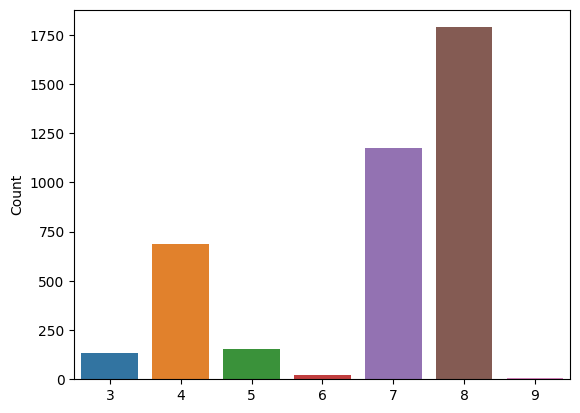

In [49]:
sns.barplot(x=wine_quality.quality.unique(), 
    y=wine_quality.groupby('quality', as_index=False).agg({'pH':'count'}).rename(columns={'pH':'Count'}).Count);

## Выберем вина, соответствующие ГОСТу

In [50]:
good_wines = wine_quality.iloc[:,:11]

In [51]:
good_wines

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
3956            6.2              0.21         0.29             1.6      0.039   
3957            6.6              0.32         0.36             8.0      0.047   
3958            6.5              0.24         0.19             1.2      0.041   
3959            5.5              0.29         0.30             1.1      0.022   
3960            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
3956                 24.0                  92.0  0.99114  3.27       0.50   
3957                 57.0                 168.0  0.99490  3.15       0.46   
3958                 30.0                 111.0  0.99254  2.99       0.46   
3959                 20.0                 110.0  0.98869  3.34       0.38   
3960                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.6  
...       ...  
3956     11.2  
3957      9.6  
3958      9.4  
3959     12.8  
3960     11.8  

[3961 rows x 11 columns]

In [52]:
good_wines['quality'] = pd.Series((good_wines.alcohol>=8.5)&(good_wines.alcohol<=15.0)&(good_wines.citric_acid<=1)&
                                  (good_wines.volatile_acidity<=1.1)&(good_wines.fixed_acidity>=3.5)
                                  &(good_wines.total_sulfur_dioxide<=300))
good_wines

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
3956            6.2              0.21         0.29             1.6      0.039   
3957            6.6              0.32         0.36             8.0      0.047   
3958            6.5              0.24         0.19             1.2      0.041   
3959            5.5              0.29         0.30             1.1      0.022   
3960            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
3956                 24.0                  92.0  0.99114  3.27       0.50   
3957                 57.0                 168.0  0.99490  3.15       0.46   
3958                 30.0                 111.0  0.99254  2.99       0.46   
3959                 20.0                 110.0  0.98869  3.34       0.38   
3960                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8     True  
1         9.5     True  
2        10.1     True  
3         9.9     True  
4         9.6     True  
...       ...      ...  
3956     11.2     True  
3957      9.6     True  
3958      9.4     True  
3959     12.8     True  
3960     11.8     True  

[3961 rows x 12 columns]

## Разделим вина по соответствию ГОСТу на два датафрейма

In [53]:
low_quality = wine_quality.iloc[good_wines.query('quality==False').index,:]
high_quality = wine_quality.iloc[good_wines.query('quality==True').index,:]

## Определим число вин, соответствующих ГОСТу

In [54]:
high_quality.count()

fixed_acidity           3949
volatile_acidity        3949
citric_acid             3949
residual_sugar          3949
chlorides               3949
free_sulfur_dioxide     3949
total_sulfur_dioxide    3949
density                 3949
pH                      3949
sulphates               3949
alcohol                 3949
quality                 3949
dtype: int64

## Визуализируем данные о соответсвующих ГОСТу винах с помощью UMAP 

In [55]:
high_quality_umap = pd.DataFrame(UMAP(n_components=2).fit_transform(high_quality))

In [56]:
px.scatter(high_quality_umap, x=0,y=1, color=wine_quality.iloc[high_quality_umap.index,:].quality)

In [57]:
high_quality_umap_3d = pd.DataFrame(UMAP(n_components=3).fit_transform(high_quality))

In [58]:
px.scatter_3d(high_quality_umap_3d, x=0,y=1, z=2, color=wine_quality.iloc[high_quality_umap_3d.index,:].quality)

## Строим график распределения вин, не соответствующих ГОСТу, по quality 

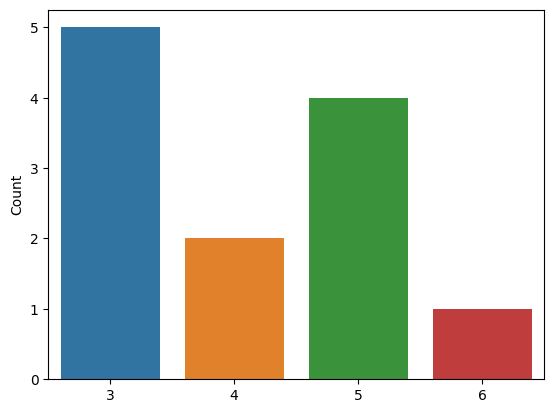

In [59]:
sns.barplot(x=low_quality.quality.unique(),
            y=low_quality.groupby('quality', as_index=False).agg({'pH':'count'}).rename(columns={'pH':'Count'}).Count);

## Проверим наличие зависимости оценки от сладости вина

In [60]:
wine_quality_sweetness=wine_quality
wine_quality_sweetness['sweetness']='dry'
wine_quality_sweetness.loc[((wine_quality.residual_sugar > 4.0)&
                            (wine_quality.residual_sugar <= 18.0)),'sweetness'] = 'semi-dry'
wine_quality_sweetness.loc[((wine_quality.residual_sugar > 18.0)&
                            (wine_quality.residual_sugar < 45.0)),'sweetness'] = 'semi-sweet'
wine_quality_sweetness.loc[(wine_quality.residual_sugar >= 45.0),'sweetness'] = 'sweet'
wine_quality_sweetness

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
3956            6.2              0.21         0.29             1.6      0.039   
3957            6.6              0.32         0.36             8.0      0.047   
3958            6.5              0.24         0.19             1.2      0.041   
3959            5.5              0.29         0.30             1.1      0.022   
3960            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
3956                 24.0                  92.0  0.99114  3.27       0.50   
3957                 57.0                 168.0  0.99490  3.15       0.46   
3958                 30.0                 111.0  0.99254  2.99       0.46   
3959                 20.0                 110.0  0.98869  3.34       0.38   
3960                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   sweetness  
0         8.8        6  semi-sweet  
1         9.5        6         dry  
2        10.1        6    semi-dry  
3         9.9        6    semi-dry  
4         9.6        6    semi-dry  
...       ...      ...         ...  
3956     11.2        6         dry  
3957      9.6        5    semi-dry  
3958      9.4        6         dry  
3959     12.8        7         dry  
3960     11.8        6         dry  

[3961 rows x 13 columns]

In [61]:
med_q = wine_quality_sweetness.groupby('sweetness', as_index=False).agg({'quality':'median'}).rename(columns={'quality':'median_quality'})

In [69]:
avg_q = wine_quality_sweetness.groupby('sweetness', as_index=False).agg({'quality':'mean'}).rename(columns={'quality':'average_quality'})

In [71]:
wine_counts = wine_quality_sweetness.groupby('sweetness', as_index=False).agg({'quality':'count'}).rename(columns={'quality':'count'})

In [72]:
sweetness_to_quality= pd.merge(pd.merge(wine_counts, med_q),avg_q)
sweetness_to_quality

sweetness  count  median_quality  average_quality
0         dry   1825             6.0         5.933151
1    semi-dry   2076             6.0         5.797688
2  semi-sweet     59             5.0         5.440678
3       sweet      1             6.0         6.000000